In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import cv2
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils

from tqdm import tqdm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
output = pd.read_csv("C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\hasy-data-labels1.csv")

In [3]:
len(output)

168233

In [ ]:
output

In [4]:
output = output.to_numpy()
output

array([['hasy-data\\v2-00000.png', 31, 'A', 50],
       ['hasy-data\\v2-00001.png', 31, 'A', 10],
       ['hasy-data\\v2-00002.png', 31, 'A', 43],
       ...,
       ['hasy-data\\v2-168230.png', 1400, '\\guillemotleft', 16925],
       ['hasy-data\\v2-168231.png', 1400, '\\guillemotleft', 16925],
       ['hasy-data\\v2-168232.png', 1400, '\\guillemotleft', 16925]],
      dtype=object)

In [5]:
a = []
b = []
for i in range(len(output)):
    a.append(output[i][1])
    b.append(output[i][2])

In [ ]:
b

In [6]:
b = np.array(b)
b.shape

(168233,)

In [7]:
import collections
def CountFrequency(arr):
    return collections.Counter(arr) 

In [8]:
freq = CountFrequency(a)

In [9]:
frequencies = []
key = []
for i,j in freq.items():
    key.append(i)
    frequencies.append(j)


In [10]:
len(key)

369

In [11]:
len(frequencies)

369

In [12]:
for i in range(17):
    fig = plt.figure(figsize =(20, 15))
    plt.bar(symbols[i*20:20 + 20*i], frequencies[i*20:20+i*20])
    plt.show()

NameError: name 'symbols' is not defined

<Figure size 1440x1080 with 0 Axes>

In [13]:
'''from PIL import Image
import os,os.path
imgs=[]
path="C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2"
os.listdir(path)
valid_images =[".png"]

for f in range(len(output)):
    ext= os.path.splitext(f)[1]
    print(ext)
    if ext.lower() not in valid_images:
        continue
    #imgs.append(np.asarray(Image.open(os.path.join(path,f)))
   ''' 
from PIL import Image
import os,os.path
imgs=[]
path="C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\"
os.listdir(path)
valid_images =[".png"]
x = []
y = []
for f in range(len(output)):
    ext=path+output[f][0]
    #print(ext)
    #if ext.lower() not in valid_images:
     #   continue
    x.append(np.asarray(cv2.imread(ext, 0)))

In [14]:
x

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

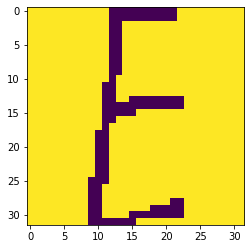

E


In [15]:
i = x[442]
import matplotlib.pyplot as plt
plt.imshow(i)
plt.show()
print(output[442][2])

In [16]:
x = np.array(x)
x.shape

(168233, 32, 32)

In [17]:
x = x.reshape(-1,32,32,1)
x = x/255
x

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [18]:
integer_now = 0
for i in range(len(a) - 1):
    prev = a[i]
    curr = a[i + 1]
    if (prev!=curr): integer_now = integer_now + 1
    a[i] = integer_now

    
for i in range(len(a)):
    if (a[i]==1400):
        a[i] = 369

In [19]:
a = np.array(a)

In [20]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, a, test_size = 0.2, random_state = 42)

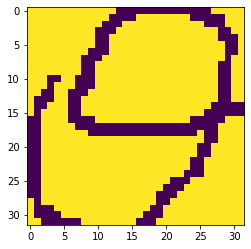

74


In [21]:
i = Xtrain[442]
import matplotlib.pyplot as plt
plt.imshow(i)
plt.show()
print(Ytrain[442])

In [22]:
for i in range(len(output)):
    output[i][1] = a[i]

In [23]:
output

array([['hasy-data\\v2-00000.png', 0, 'A', 50],
       ['hasy-data\\v2-00001.png', 0, 'A', 10],
       ['hasy-data\\v2-00002.png', 0, 'A', 43],
       ...,
       ['hasy-data\\v2-168230.png', 368, '\\guillemotleft', 16925],
       ['hasy-data\\v2-168231.png', 368, '\\guillemotleft', 16925],
       ['hasy-data\\v2-168232.png', 369, '\\guillemotleft', 16925]],
      dtype=object)

In [ ]:
final_df = pd.DataFrame(output, columns = ['Path','symbol_id','latex', 'user_id'])

In [ ]:
final_df.to_csv("C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\labels.csv")

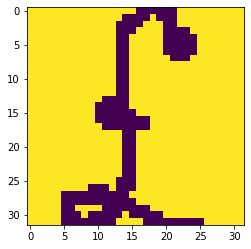

122


In [24]:
i = Xtrain[4427]
import matplotlib.pyplot as plt
plt.imshow(i)
plt.show()
print(Ytrain[4427])

In [ ]:
Xtrain[0].shape

In [25]:
Xtrain = np.array(Xtrain)

In [26]:
Xtrain.shape

(134586, 32, 32, 1)

In [ ]:
import cv2

In [ ]:
new_array = x

In [ ]:
new_array = cv2.resize(new_array, (32,32,1))

In [ ]:
Ytrain = np.array(Ytrain)

In [27]:
X_train, x_val, y_train, y_val = train_test_split(Xtrain, 
                                                  Ytrain, 
                                                  test_size= 0.1, 
                                                  random_state=88)

In [28]:
y_train.shape

(121127,)

In [29]:
y_train = np.array(y_train)

In [30]:
y_train.shape

(121127,)

In [ ]:
a

In [31]:
y_train = np_utils.to_categorical(y_train,370)
y_train.shape

(121127, 370)

In [ ]:
a = np.array(a)

In [ ]:
a.shape

In [ ]:
classes = np.unique(a)
print(classes)

In [ ]:
len(classes)

In [ ]:
a.head

In [ ]:
y_train

In [32]:
X_train = X_train.reshape(-1, 32, 32, 1)
X_train.shape

(121127, 32, 32, 1)

In [ ]:
X_train

In [ ]:
a = np_utils.to_categorical(a,370)
a.shape

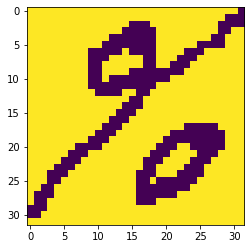

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [33]:
i = X_train[44272]
import matplotlib.pyplot as plt
plt.imshow(i)
plt.show()
print(y_train[44272])

In [34]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(Dropout(0.2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(Dropout(0.2))
model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(370, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 48)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 48)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          7

In [ ]:
import pandas as pd
import numpy as np
import keras
import glob
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from mlxtend.preprocessing import minmax_scaling
from sklearn.metrics import roc_curve, auc

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Input, BatchNormalization, Multiply, Activation
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras import backend as K

import os

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), strides = 2, padding = 'Same', activation ='relu', input_shape = (32,32,1), kernel_initializer='he_normal'))
model.add(Conv2D(filters = 32, kernel_size = (5,5), strides = 2, padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 48, kernel_size = (3,3),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 48, kernel_size = (3,3),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 80, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(Conv2D(filters = 80, kernel_size = (2,2),padding = 'Same', activation ='relu',kernel_initializer='he_normal'))
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation = "relu",kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax",kernel_initializer='he_normal',kernel_regularizer=l2()))


In [ ]:
                   BATCH_SIZE = 1300
                   NUM_CLASSES = 370
                   EPOCHS = 30
                   INIT_DROPOUT_RATE = 0.5
                   MOMENTUM_RATE = 0.9
                   INIT_LEARNING_RATE = 0.01
                   L2_DECAY_RATE = 0.0005
                   CROP_SIZE = 32
                   #LOG_DIR = './logs'
                   #MODEL_PATH = './keras_cifar100_model.h5'

In [ ]:
                   model = Sequential()
                   model.add(ZeroPadding2D(4, input_shape=X_train.shape[1:]))
                   
                   # Stack 1:
                   model.add(Conv2D(384, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 2:
                   model.add(Conv2D(384, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(384, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(640, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 3:
                   model.add(Conv2D(640, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(768, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 4:
                   model.add(Conv2D(768, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(896, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 5:
                   model.add(Conv2D(896, (3, 3), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(1024, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 6:
                   model.add(Conv2D(1024, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Conv2D(1152, (2, 2), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))

                   # Stack 7:
                   model.add(Conv2D(1152, (1, 1), padding='same', kernel_regularizer=l2(L2_DECAY_RATE)))
                   model.add(Activation('elu'))
                   model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
                   model.add(Dropout(INIT_DROPOUT_RATE))
                   model.add(Flatten())
                   model.add(Dense(NUM_CLASSES))
                   model.add(Activation('softmax'))


In [35]:

optimizer_name = 'adam'

model.compile(loss='categorical_crossentropy', optimizer=optimizer_name, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
mcp_save = ModelCheckpoint('my_model.h5', save_best_only=True, monitor='val_loss', verbose=1, mode='auto')

In [36]:
X_train.shape

(121127, 32, 32, 1)

In [37]:

history = model.fit(X_train,
                    y_train, 
                    epochs=1300, 
                    batch_size=100, 
                    verbose=1, 
                    validation_split=0.1,
                    callbacks=[early_stopping, mcp_save])

Epoch 1/1300
1091/1091 [==============================] - 53s 48ms/step - loss: 2.9695 - accuracy: 0.3569 - val_loss: 1.4126 - val_accuracy: 0.6279

Epoch 00001: val_loss improved from inf to 1.41263, saving model to my_model.h5
Epoch 2/1300
1091/1091 [==============================] - 54s 49ms/step - loss: 1.5618 - accuracy: 0.5886 - val_loss: 1.0829 - val_accuracy: 0.7073

Epoch 00002: val_loss improved from 1.41263 to 1.08288, saving model to my_model.h5
Epoch 3/1300
1091/1091 [==============================] - 55s 51ms/step - loss: 1.3218 - accuracy: 0.6415 - val_loss: 0.9464 - val_accuracy: 0.7384

Epoch 00003: val_loss improved from 1.08288 to 0.94638, saving model to my_model.h5
Epoch 4/1300
1091/1091 [==============================] - 56s 51ms/step - loss: 1.1882 - accuracy: 0.6721 - val_loss: 0.8987 - val_accuracy: 0.7483

Epoch 00004: val_loss improved from 0.94638 to 0.89875, saving model to my_model.h5
Epoch 5/1300
1091/1091 [==============================] - 55s 51ms/step 

In [ ]:
symbols = []
for i in range(len(output) - 1):
    if (output[i + 1][1]>output[i][1]):
        symbols.append(output[i][2])
        
symbols

In [ ]:
X_train.reshape(121127, 32, 32, 1)

In [ ]:
symbols.shape

In [ ]:
symbols.size()

In [ ]:
symbols = symbols.to_numpy()

In [ ]:
symbols = np.array(symbols)

In [ ]:
symbols.shape

In [ ]:
symbols.append("\\guillemotleft")

In [ ]:
symbols = symbols.tolist()

In [ ]:
symbols.append("\\guillemotleft")

In [ ]:
symbols = np.array(symbols)
symbols.shape

In [ ]:
symbols = symbols.tolist()

In [43]:
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model Loss')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

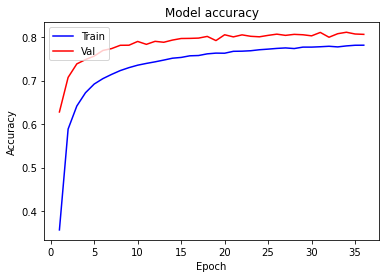

In [40]:
plotgraph(epochs, acc, val_acc)

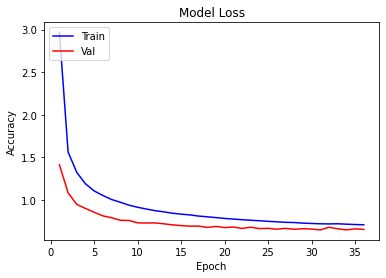

In [44]:
plotgraph(epochs, loss, val_loss)

In [ ]:
model = load_model('C:\\Users\\karnz\\my_model.h5')
model.summary()

In [ ]:
x_val.shape

In [ ]:
x_val = x_val.reshape(-1, 32, 32, 1)
x_val.shape

In [ ]:
y_pred = model.predict( x_val)
y_pred.shape

In [ ]:
import cv2
test = cv2.imread("C:\\Users\\karnz\\Downloads\\y.png", cv2.IMREAD_GRAYSCALE)

In [ ]:
plt.imshow(test)

In [ ]:
test.shape

In [ ]:
test = cv2.resize(test, (32,32))

In [ ]:
plt.imshow(test)

In [ ]:
test = cv2.fastNlMeansDenoising(test, test, h = 5, templateWindowSize = 7, 	searchWindowSize = 21) 

In [ ]:
plt.imshow(test)

In [ ]:
test = test.reshape(-1,32,32,1)

In [ ]:
pred = model.predict(test)
pred = pred.argmax()
print(symbols[pred])

In [ ]:
pred

In [ ]:
t = cv2.imread("C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\hasy-data\\v2-00051.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(t)

In [ ]:
t.shape

In [ ]:
t = t.reshape(-1,32,32,1)

In [ ]:
pred = model.predict(t)
pred = pred.argmax()
print(pred)

In [ ]:
for i in range(10, 16):
    plt.plot(380 + (i%10+1))
    plt.imshow(  x_val[i].reshape(32, 32, 1), cmap=plt.cm.gray)
    plt.title(symbols[y_pred[i].argmax()])
    plt.show()

In [ ]:
for i in range(42, 48):
    plt.plot(380 + (i%10+1))
    plt.imshow(x_val[i].reshape(32, 32, 1), cmap=plt.cm.gray)
    plt.title(symbols[y_pred[i].argmax()])

In [ ]:
for i in range(42, 60):
    plt.plot(380 + (i%10+1))
    plt.imshow(x_val[i].reshape(32, 32, 1), cmap=plt.cm.gray)
    plt.title(symbols[y_pred[i].argmax()])
    plt.show()

In [ ]:
x_val.shape

In [ ]:
for i in range(100):
    plt.plot(380 + (i%10+1))
    plt.imshow(x_val[i].reshape(32, 32, 1), cmap=plt.cm.gray)
    plt.title(symbols[y_pred[i].argmax()])
    plt.show()

In [ ]:
y_val.shape

In [ ]:
y_train.shape

In [ ]:
y_val = np_utils.to_categorical(y_val,370)
y_val.shape

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(x_val)
print(classification_report(Y_test, y_pred))

In [ ]:
!pip install tensorflow==2.5

In [ ]:
y_val.shape

In [ ]:
y_val = np_utils.to_categorical(y_val,370)
y_val.shape

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

Y_test = np.argmax(y_val, axis=1) # Convert one-hot to index
y_pred = model.predict(x_val)
print(classification_report(Y_test, y_pred))

In [ ]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [ ]:
keras.__version__

In [ ]:
!

In [ ]:
!keras.__version__

In [ ]:
Xtest.shape

In [ ]:
Ytest.shape

In [ ]:
Ytest = np_utils.to_categorical(Ytest,370)
Ytest.shape

In [ ]:
Ypred = model.predict(Xtest)

In [ ]:
def acc(y_true, y_pred):
    return np.equal(np.argmax(y_true, axis=-1), np.argmax(y_pred, axis=-1)).mean()

In [ ]:
accuracy = acc(Ytest, Ypred)

In [ ]:
accuracy

In [ ]:
Ytrain.shape

In [ ]:
Xtest.shape

In [ ]:
last_test = np.asarray(cv2.imread("C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\hasy-data\\v2-00076.png", 0))
last_test.shape

In [ ]:
last_test

In [ ]:
Xtest

In [ ]:
last_test = last_test.reshape(-1,32,32,1)

In [ ]:
last_test = last_test/255
pred = model.predict(last_test)
pred = pred.argmax()
print(pred)

In [ ]:
symbols[pred]

In [ ]:
last_test = 1 - last_test
pred = model.predict(last_test)
pred = pred.argmax()
print(pred)

In [ ]:
symbols[pred]

In [ ]:
frequencies

In [ ]:
output

In [ ]:
from PIL import Image
import os,os.path
imgs=[]
path="C:\\Users\\karnz\\Downloads\\HASYv2.tar\\HASYv2\\"
os.listdir(path)
valid_images =[".png"]
class_test = []
y = []
for f in range(len(output)):
    ext=path+output[f][0]
    #print(ext)
    #if ext.lower() not in valid_images:
     #   continue
    class_test.append(np.asarray(cv2.imread(ext, 0)))
    y.append(output[f][1])

In [ ]:
for i in range(10):
    print(y[i])
    plt.imshow(class_test[i])
    plt.show()

In [ ]:
len(class_test)

In [ ]:
classes = []
ytrue = []
intnow = 0
for i in range(len(frequencies)):
    k = []
    classes.append(k)
    ytrue.append(i)
    for j in range(frequencies[i]):
        classes[i].append(class_test[j + intnow])
    intnow = intnow + frequencies[i]

In [ ]:
ytrue

In [ ]:
classes

In [ ]:
classes = np.array(classes)
classes.shape

In [ ]:
for i in range(len(classes)):
    classes[i] = np.array(classes[i])

In [ ]:
classes[0].shape

In [ ]:
for i in range(len(classes)):
    classes[i] = classes[i].reshape(-1,32,32,1)

In [ ]:
a

In [ ]:
accuracies = []
for i in range(len(classes)):
    pred = loaded_model.predict(classes[i])
    #pred = pred.argmax()
    itrue = [i for j in range(frequencies[i])]
    accuracies.append(acc(itrue, pred))


In [ ]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
#from keras as backend as K
#K.common.set_image_dim_ordering('th')
from keras.models import model_from_json

In [ ]:
json_file = open('C:\\Users\\karnz\\model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("C:\\Users\\karnz\\model_final.h5")

In [ ]:
for i in range(18):
    fig = plt.figure(figsize =(20, 15))
    plt.bar(symbols[i*20: 20 + i*20],accuracies[i*20:20 + 20*i] )
    plt.show()

In [ ]:
a.shape

In [ ]:
pred


In [ ]:
Ytes

In [ ]:
Ytest

In [ ]:
ytest=[]
for i in range(len(Ytest)):
    ytest.append(Ytest.argmax())

In [ ]:
ytest

In [ ]:
accuracies

In [ ]:
pred = loaded_model.predict(classes[74])
#pred = pred.argmax()
#accuracy = acc(75, pred)

In [ ]:
accuracy

In [ ]:
classes[74].shape

In [ ]:
pred

In [ ]:
pred.shape

In [ ]:
for i in range(len(pred)):
    pred[i] = pred[i].argmax()

In [ ]:
pred

In [ ]:
pred.shape

In [ ]:
yt = [74 for i in range(651)]

In [ ]:
accuracy = acc(74, pred)

In [ ]:
accuracy

In [ ]:
plt.imshow(classes[74][0])
plt.show

In [ ]:
pred = loaded_model.predict(classes[38])

In [ ]:
for i in range(len(pred)):
    pred[i] = pred[i].argmax()
    #flag = pred[i][0]
    #pred[i] = 0
    #pred[i] = flag

In [ ]:
pred[0]

In [ ]:
pred[79]

In [ ]:
accu = 0
axr = 0
for i in range(len(pred)):
    if (pred[i][0]==125):
        axr = axr + 1
accu = axr/(len(pred))
accu

In [ ]:
axr

In [ ]:
pred = loaded_model.predict(classes[125])

In [ ]:
pred

In [ ]:
pred[79][0]

In [ ]:
pred[74][0]

In [ ]:
len(pred)

In [ ]:
count = 0
for i in range(len(pred)):
    if (pred[i][0]==38):
        count = count + 1

In [ ]:
count

In [ ]:
for i in range(len(pred)):
    print(pred[i][0])

In [ ]:
plt.imshow(classes[38][2500])

In [ ]:
accuracies = []
for i in range(369):
    pred = loaded_model.predict(classes[i])
    for j in range(len(pred)):
        pred[j] = pred[j].argmax()
    count = 0
    for j in range(len(pred)):
        if (pred[j][0]==i):
            count = count + 1
    accuracies.append(count/len(pred))
accuracies

In [ ]:
for i in range(17):
    fig = plt.figure(figsize =(30, 22))
    plt.bar(symbols[i*20:20 + 20*i], accuracies[i*20:20+i*20])
    plt.show()